In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
import io
data1 = pd.read_csv(io.BytesIO(uploaded['train.csv']))
data2=pd.read_csv(io.BytesIO(uploaded['test.csv']))
data=pd.concat([data1,data2])

# Quick Look at the data

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


# Visualize Data

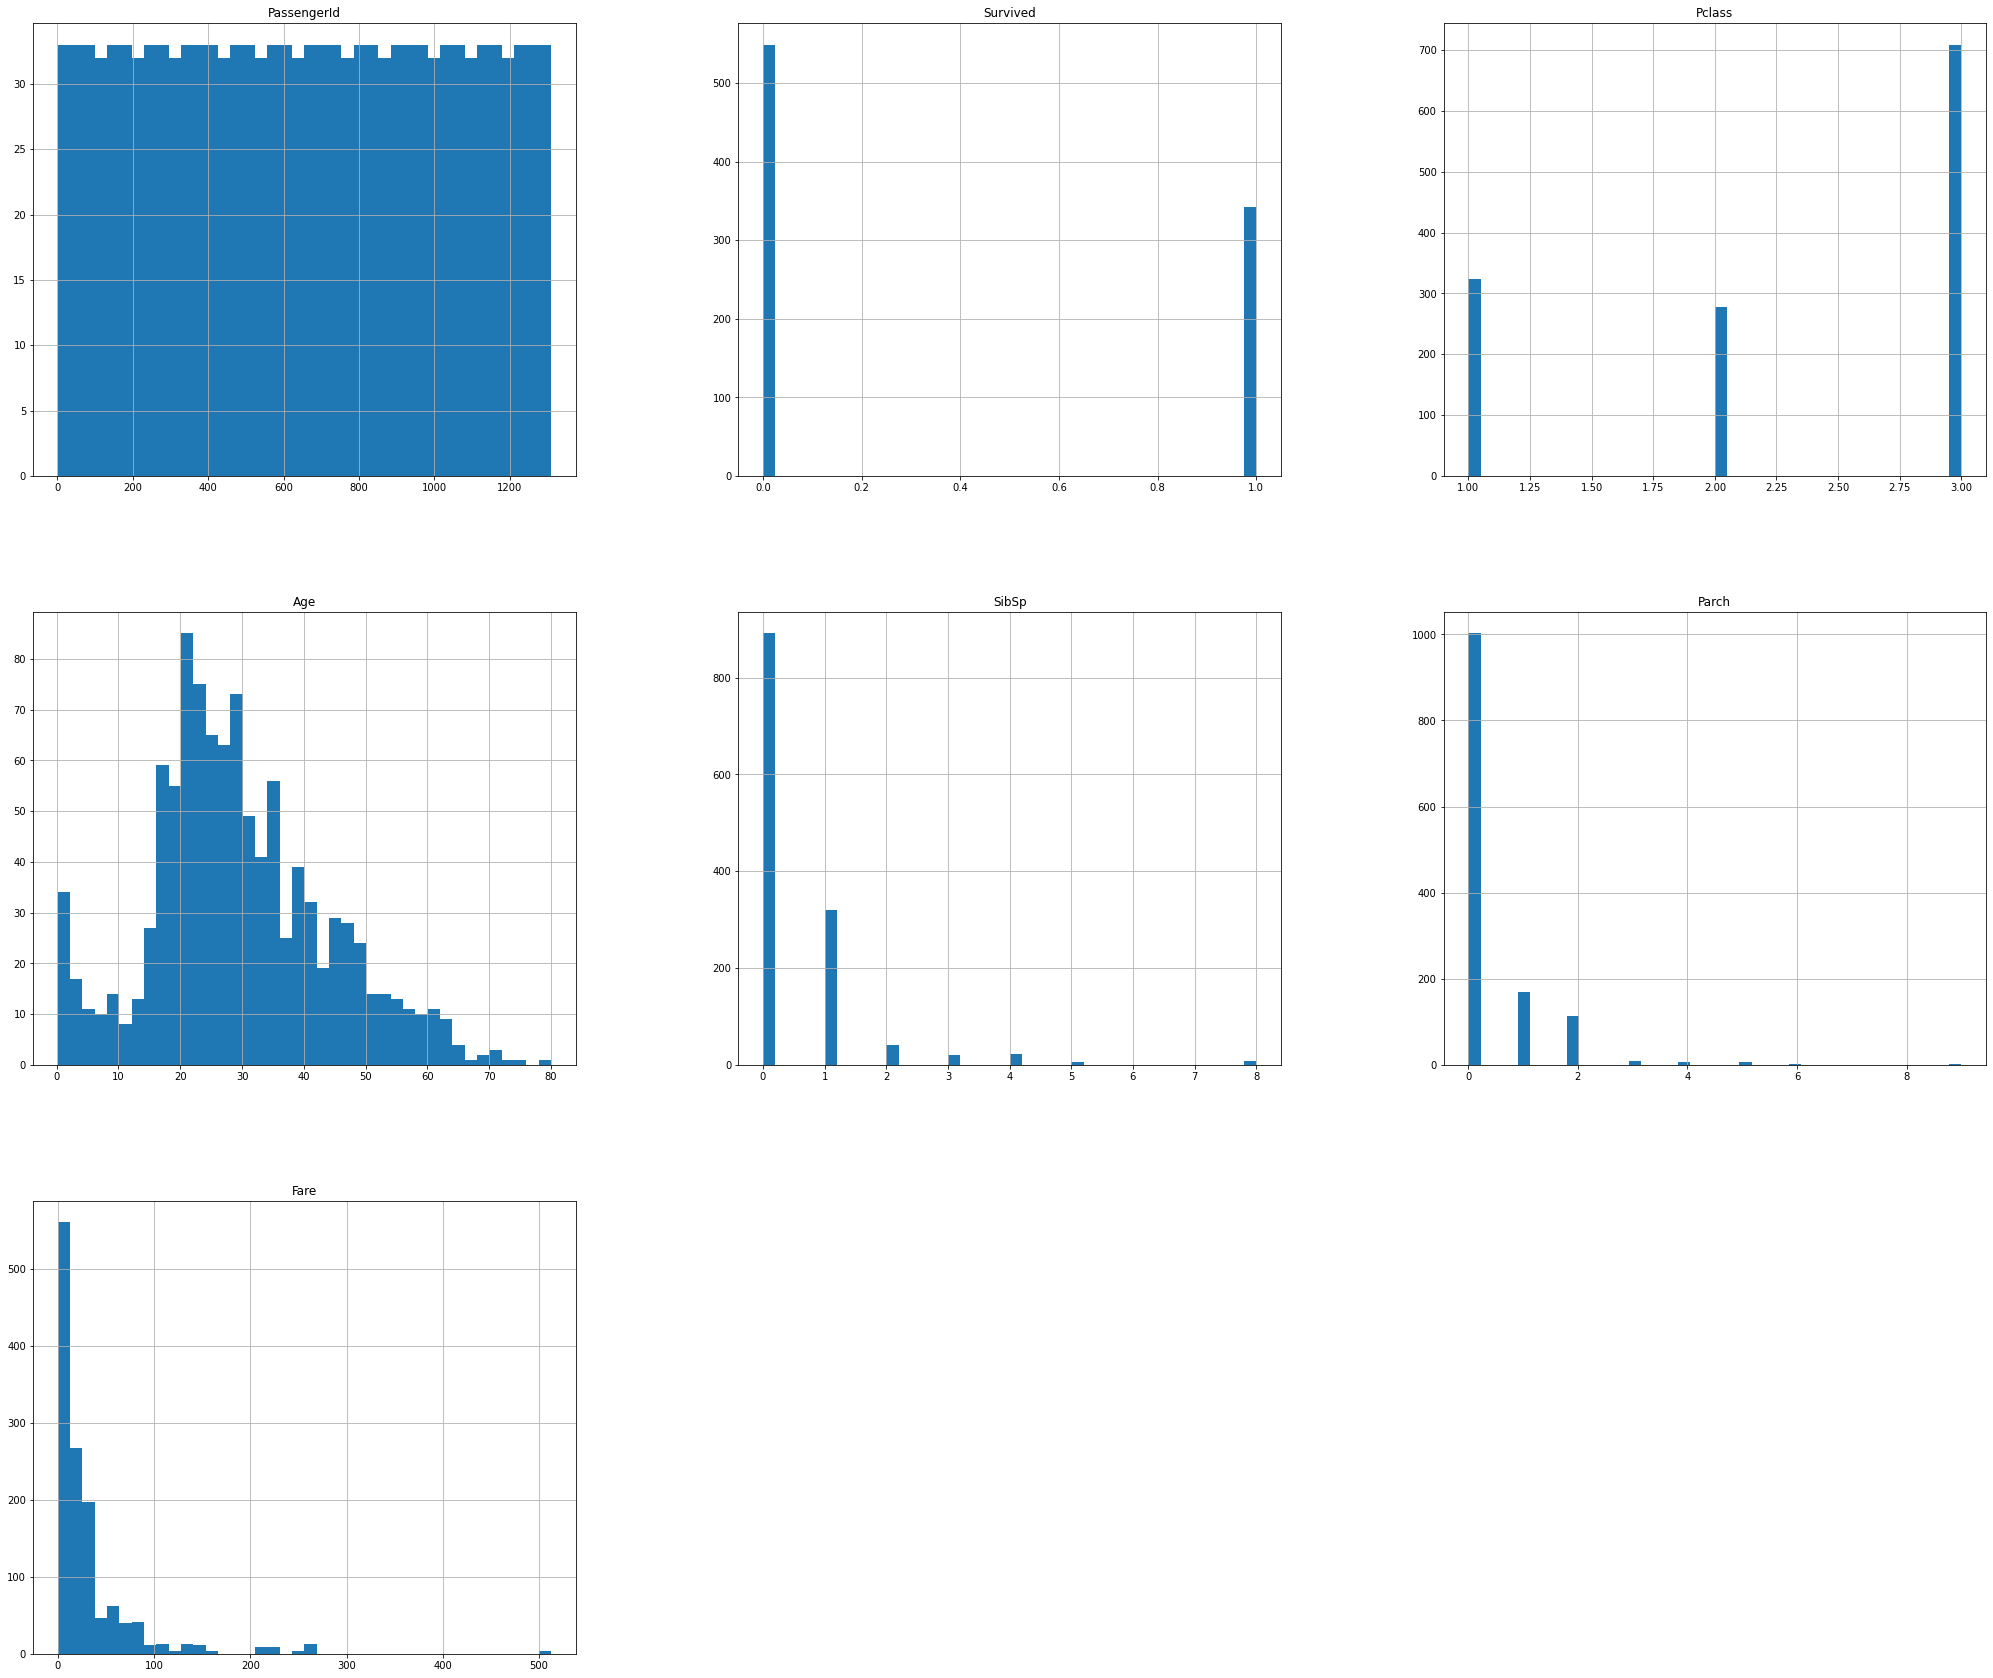

In [ ]:
data.hist(figsize = (35,30), bins = 40)
plt.show()

## Correlation

In [ ]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


In [ ]:
data.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

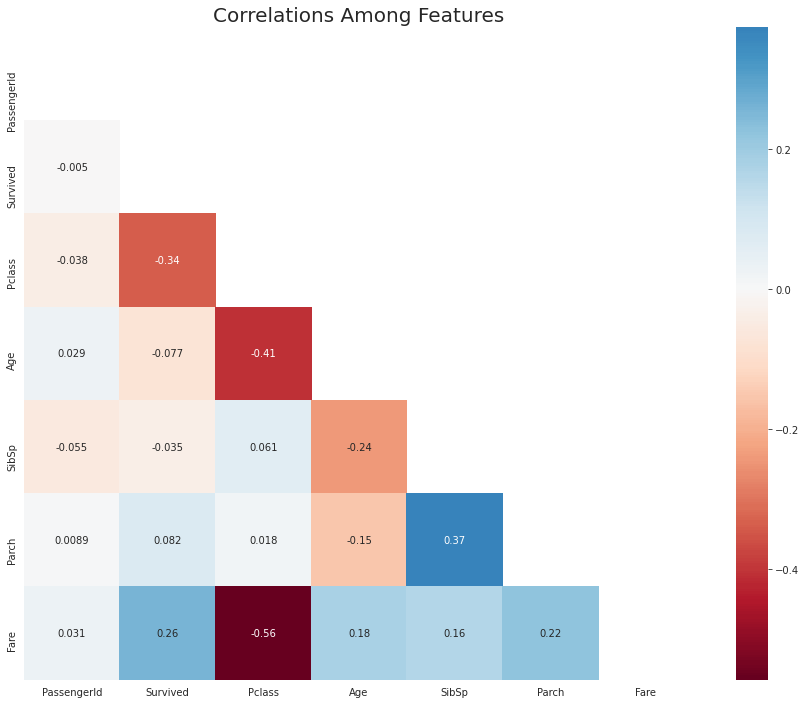

In [ ]:
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(data.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu',
            center = 0)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20);

### Inference
From the histograms of features, we find that Age has a ***positive skewness*** to some extent. While the other features such as Sibsp, Parch, and Fare have almost the same shapes. That is a shape that decreases as we move along the x axis
```
The correlations we see are 


*   Fare and P-class have a significant correlation with Survived
*   P-class has a significant correlation with Age and Fare of the person
*   The age has a significant correlation with the Sibsp and Parch
*   PArch has a significant correlation with SibSp and F

```
Correlations above 0.1 in magnitude
> Fare v Survivev<br>
> Pclass v Survive<br>
> Pclass v Fare<br>
> Pclass v Age<br>
> Age v SibSp<br>
> Age v Parch<br>
> Sibsp v Fare<br>
> Sibsp v Parch<br>
> Parch v Fare<br>




## Statistical Inference

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
data[["Survived","Pclass","Age","SibSp","Parch","Fare"]].groupby(["Survived"],as_index=False).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.0,1.950292,28.343690,0.473684,0.464912,48.395408


In [ ]:
data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


## Categorial Data

### Histograms

Text(0.5, 1.0, 'Pclass Not Survived')

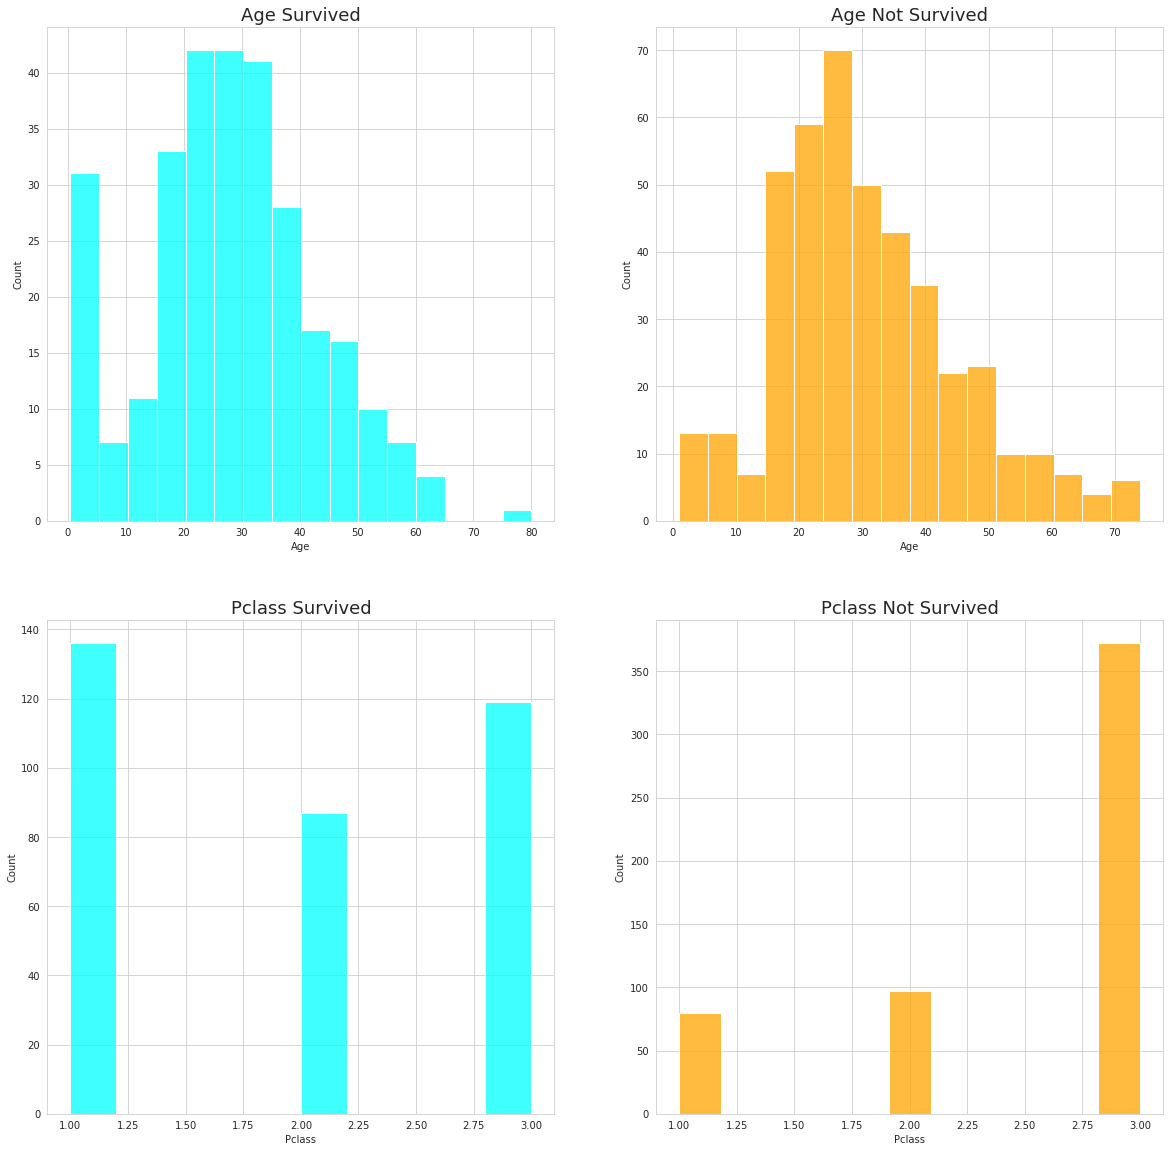

In [ ]:
f, ax = plt.subplots(nrows=2,ncols=2,figsize=(20,20))
sns.histplot(x=data.loc[(data['Survived'] == 1),'Age'] ,label='survived',ax=ax[0,0],color='cyan')
sns.histplot(x=data.loc[(data['Survived'] == 0),'Age'] ,label='survived',ax=ax[0,1],color='orange')
ax[0,0].set_title("Age Survived",fontsize=18)
ax[0,1].set_title("Age Not Survived",fontsize=18)

sns.histplot(x=data.loc[(data['Survived'] == 1),'Pclass'] ,label='survived',ax=ax[1,0],color='cyan')
sns.histplot(x=data.loc[(data['Survived'] == 0),'Pclass'] ,label='survived',ax=ax[1,1],color='orange')
ax[1,0].set_title("Pclass Survived",fontsize=18)
ax[1,1].set_title("Pclass Not Survived",fontsize=18)



### Bar Graphs

'Survived'

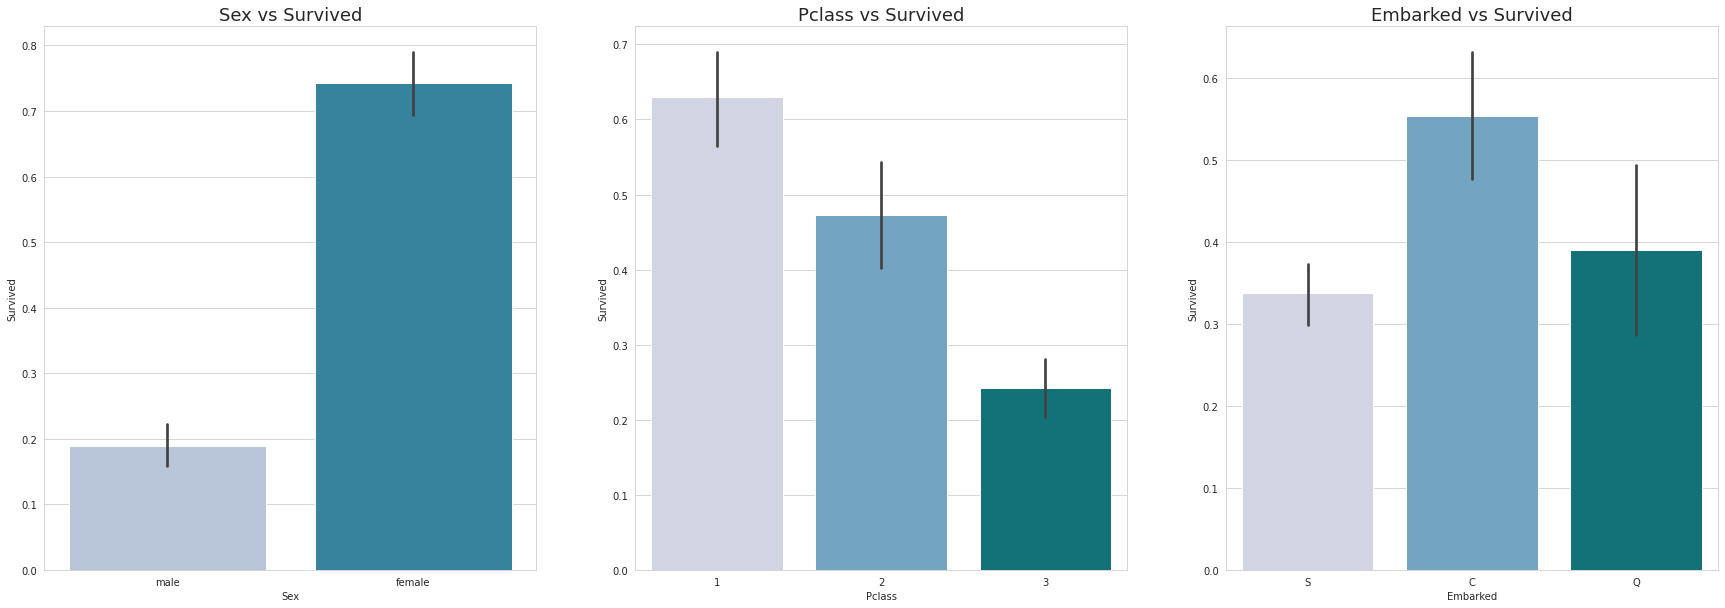

In [ ]:
f, ax = plt.subplots(nrows=1,ncols=3, figsize=(30,10))
sns.barplot(x="Sex",y="Survived",data=data,ax=ax[0],palette=("PuBuGn"))
ax[0].set_title("Sex vs Survived",fontsize=18)
ax[0].get_xlabel()
ax[0].get_ylabel()

sns.barplot(x="Pclass",y="Survived",data=data,ax=ax[1],palette=("PuBuGn"))
ax[1].set_title("Pclass vs Survived",fontsize=18)
ax[1].get_xlabel()
ax[1].get_ylabel()

sns.barplot(x="Embarked",y="Survived",data=data,ax=ax[2],palette=("PuBuGn"))
ax[2].set_title("Embarked vs Survived",fontsize=18)
ax[2].get_xlabel()
ax[2].get_ylabel()


### Count plots

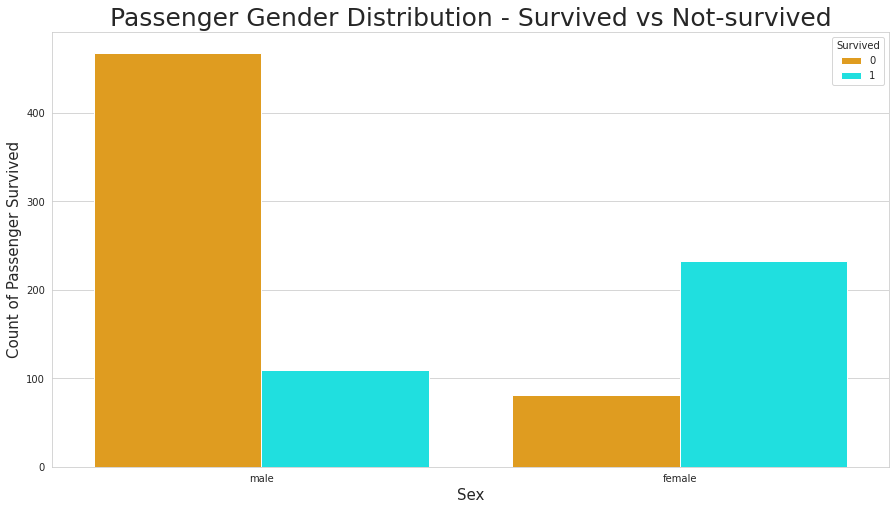

In [ ]:
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = data, 
                   palette = {1:"cyan", 0:"orange"}
)

ax.set_title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 25)
ax.set_xlabel("Sex", fontsize = 15)
ax.set_ylabel("Count of Passenger Survived", fontsize = 15)

leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("0")
legs[1].set_text("1")
plt.show()

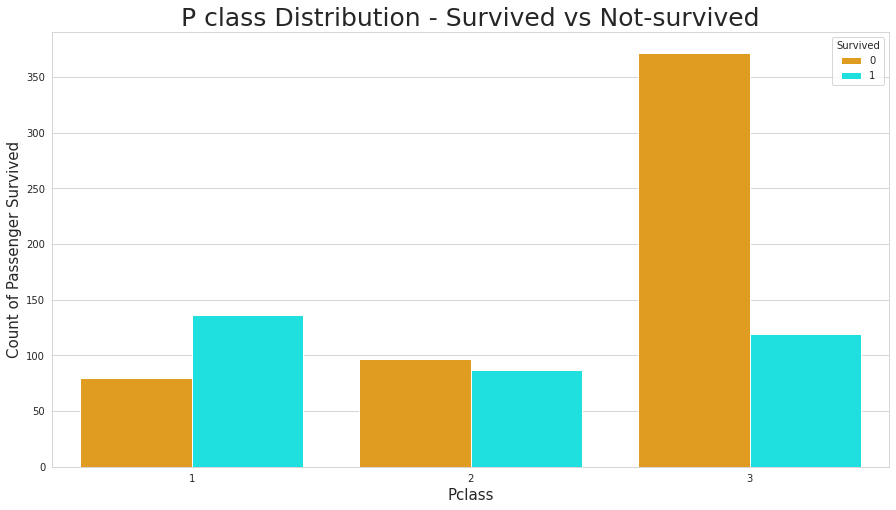

In [ ]:
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Pclass", 
                   hue="Survived",
                   data = data, 
                   palette =  {1:"cyan", 0:"orange"}
)

ax.set_title("P class Distribution - Survived vs Not-survived", fontsize = 25)
ax.set_xlabel("Pclass", fontsize = 15)
ax.set_ylabel("Count of Passenger Survived", fontsize = 15)

leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("0")
legs[1].set_text("1")
plt.show()

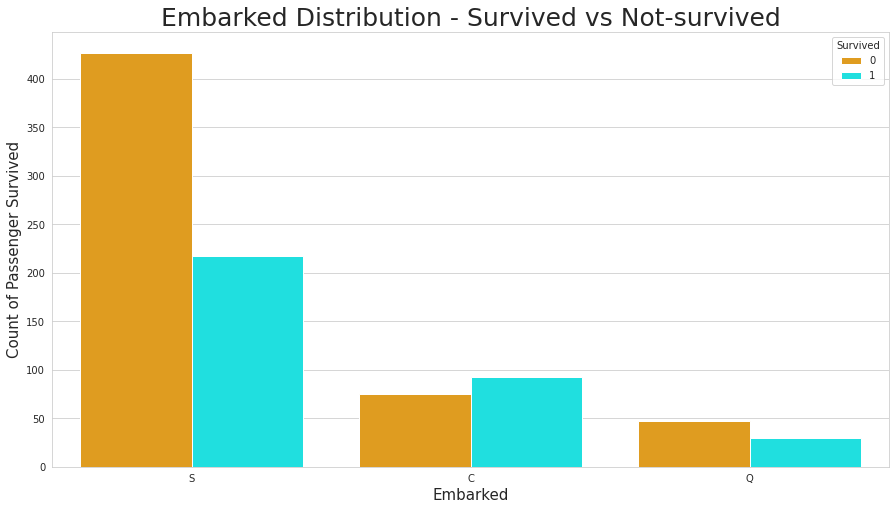

In [ ]:
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Embarked", 
                   hue="Survived",
                   data = data,  
                   palette = {1:"cyan", 0:"orange"}
)

ax.set_title("Embarked Distribution - Survived vs Not-survived", fontsize = 25)
ax.set_xlabel("Embarked", fontsize = 15)
ax.set_ylabel("Count of Passenger Survived", fontsize = 15)

leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("0")
legs[1].set_text("1")
plt.show()

### Inference
From the bar graphs above we can infer alot of data. The key aspects are:


*   Almost 75% of females survived 
*   A mere 18% of the males survived
*   Out of all the P-classes, people belonging to class 1 had the highest probability to survive.
*   About 62% of the class 1 inhabitants survived. 
*   About 55% of the people belonging to C embarkment survived
*   About 33% of the people belonging to S embarkment survived
*   About 39% of the people belonging to Q embarkment survived

We gather more detailed insights from the count plots<br>
> ->  The number of males who did not survive is almost 4 times the number of people who survived<br>
> ->  The number of females who did survive is almost 2.5 times the number of people who not survived<br>
> ->The number of people in class 3 who did not survive is almost 3 times the number of people who survived<br>
> ->The number of people in class 2 and class 1 who did  survive is almost the same as the number of people who survived<br>
->The number of people in S embarkment who did not survive is almost 2 times the number of people who survived<br>
> ->The number of people in C embarkment and Q embarkment who did  survive is almost the same as the number of people who survived<br>







## Numeric Data

### Kdeplots

Text(0.5, 1.0, 'Parch vs Survived')

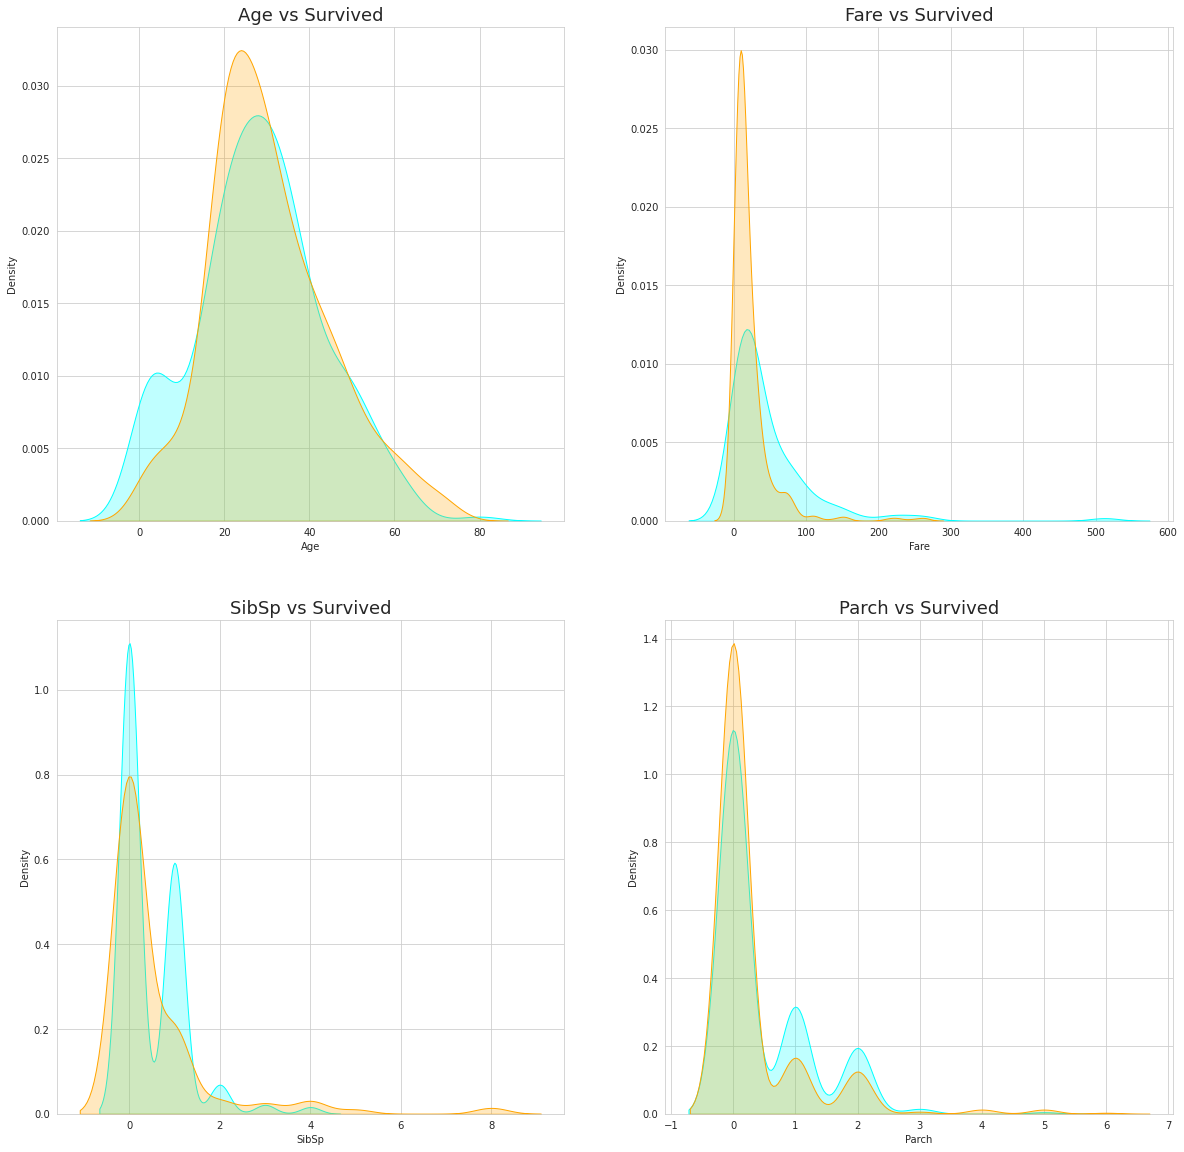

In [ ]:
f, ax = plt.subplots(nrows=2,ncols=2,figsize=(20,20))
sns.kdeplot(x=data.loc[(data['Survived'] == 1),'Age'] ,label='survived',shade=True,ax=ax[0,0],color='cyan')
sns.kdeplot(x=data.loc[(data['Survived'] == 0),'Age'] ,label='survived',shade=True,ax=ax[0,0],color='orange')
ax[0,0].set_title("Age vs Survived",fontsize=18)

sns.kdeplot(x=data.loc[(data['Survived'] == 1),'Fare'] ,label='survived',shade=True,ax=ax[0,1],color='cyan')
sns.kdeplot(x=data.loc[(data['Survived'] == 0),'Fare'] ,label='survived',shade=True,ax=ax[0,1],color='orange')
ax[0,1].set_title("Fare vs Survived",fontsize=18)

sns.kdeplot(x=data.loc[(data['Survived'] == 1),'SibSp'] ,label='survived',shade=True,ax=ax[1,0],color='cyan')
sns.kdeplot(x=data.loc[(data['Survived'] == 0),'SibSp'] ,label='survived',shade=True,ax=ax[1,0],color='orange')
ax[1,0].set_title("SibSp vs Survived",fontsize=18)

sns.kdeplot(x=data.loc[(data['Survived'] == 1),'Parch'] ,label='survived',shade=True,ax=ax[1,1],color='cyan')
sns.kdeplot(x=data.loc[(data['Survived'] == 0),'Parch'] ,label='survived',shade=True,ax=ax[1,1],color='orange')
ax[1,1].set_title("Parch vs Survived",fontsize=18)


## Visualizing correlated data

### Line plots

Text(0.5, 1.0, 'SibSp vs Parch')

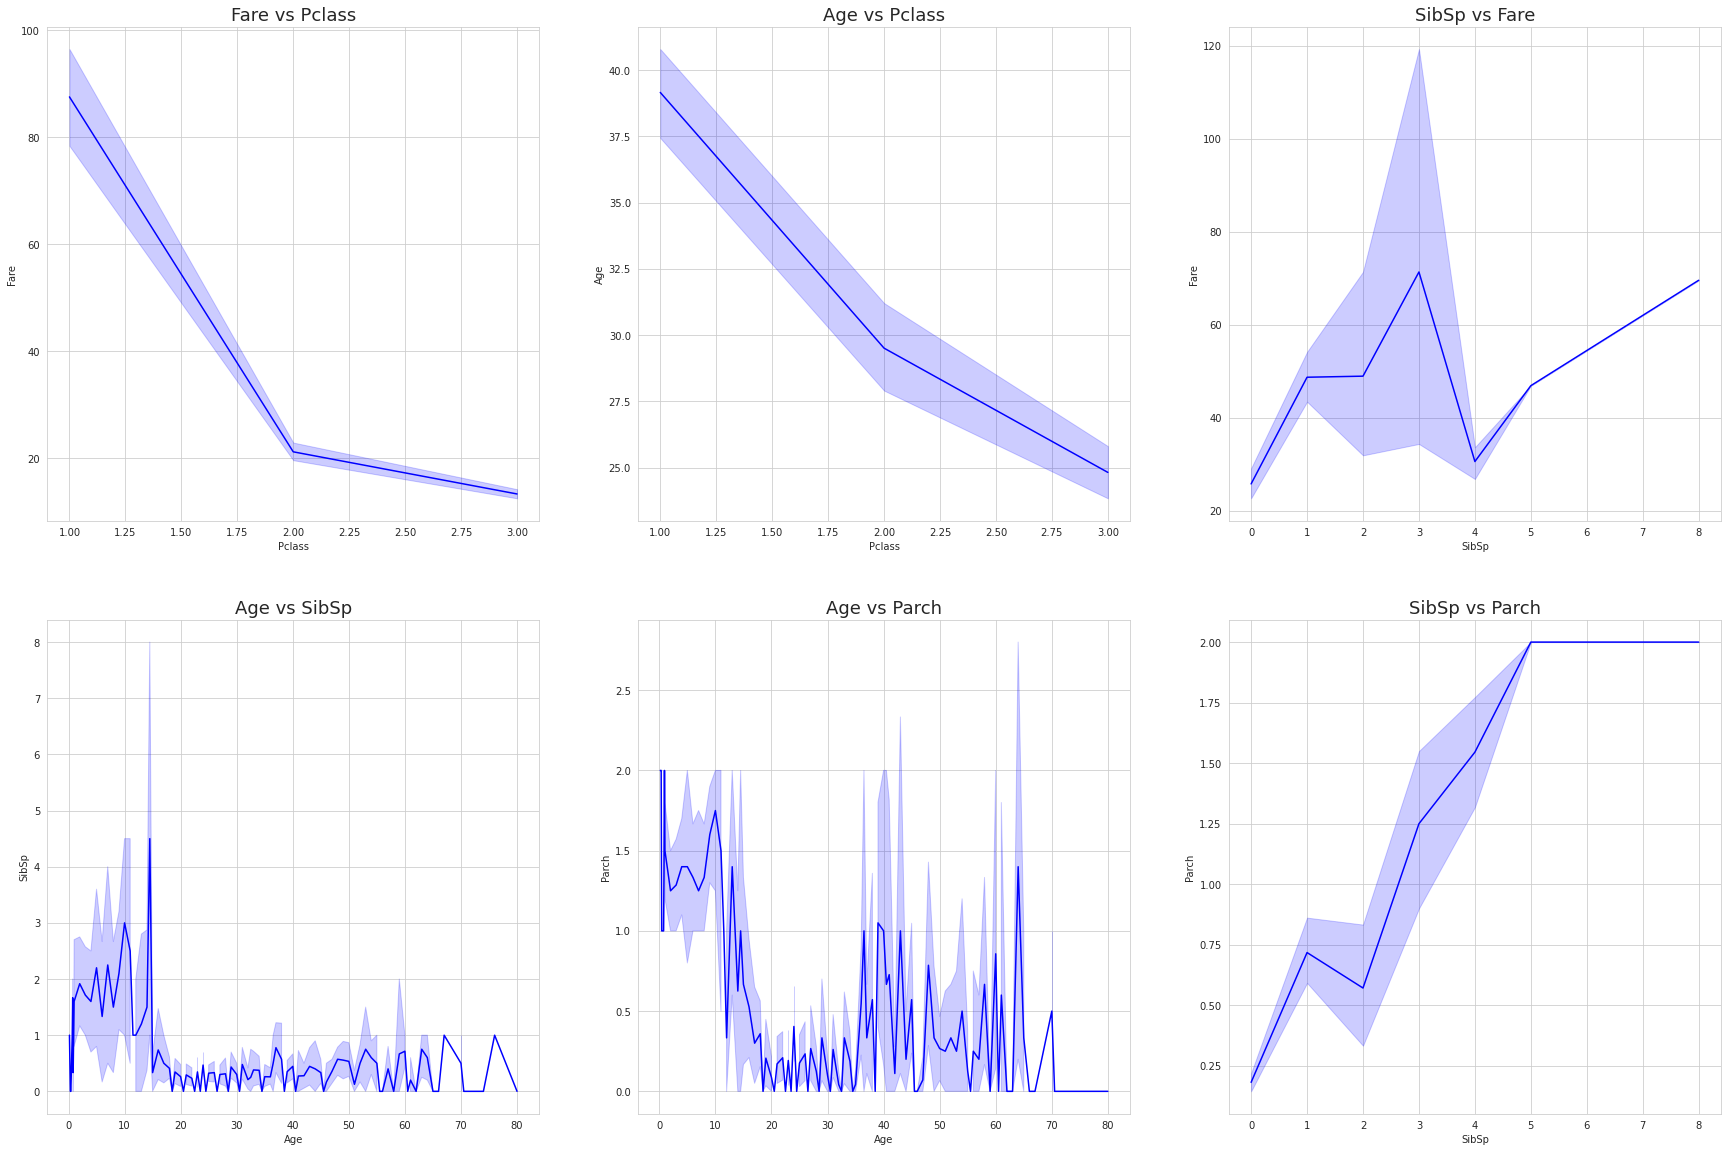

In [ ]:
f, ax = plt.subplots(nrows=2,ncols=3,figsize=(30,20))
sns.lineplot(x="Pclass",y="Fare",data=data,ax=ax[0,0],color='blue')
ax[0,0].set_title("Fare vs Pclass",fontsize=18)

sns.lineplot(x="Pclass",y="Age",data=data,ax=ax[0,1],color='blue')
ax[0,1].set_title("Age vs Pclass",fontsize=18)

sns.lineplot(x="SibSp",y="Fare",data=data,ax=ax[0,2],color='blue')
ax[0,2].set_title("SibSp vs Fare",fontsize=18)

sns.lineplot(x="Age",y="SibSp",data=data,ax=ax[1,0],color='blue')
ax[1,0].set_title("Age vs SibSp",fontsize=18)

sns.lineplot(x="Age",y="Parch",data=data,ax=ax[1,1],color='blue')
ax[1,1].set_title("Age vs Parch",fontsize=18)

sns.lineplot(x="SibSp",y="Parch",data=data,ax=ax[1,2],color='blue')
ax[1,2].set_title("SibSp vs Parch",fontsize=18)

### Bloxplots

Text(0.5, 1.0, 'SibSp vs Parch')

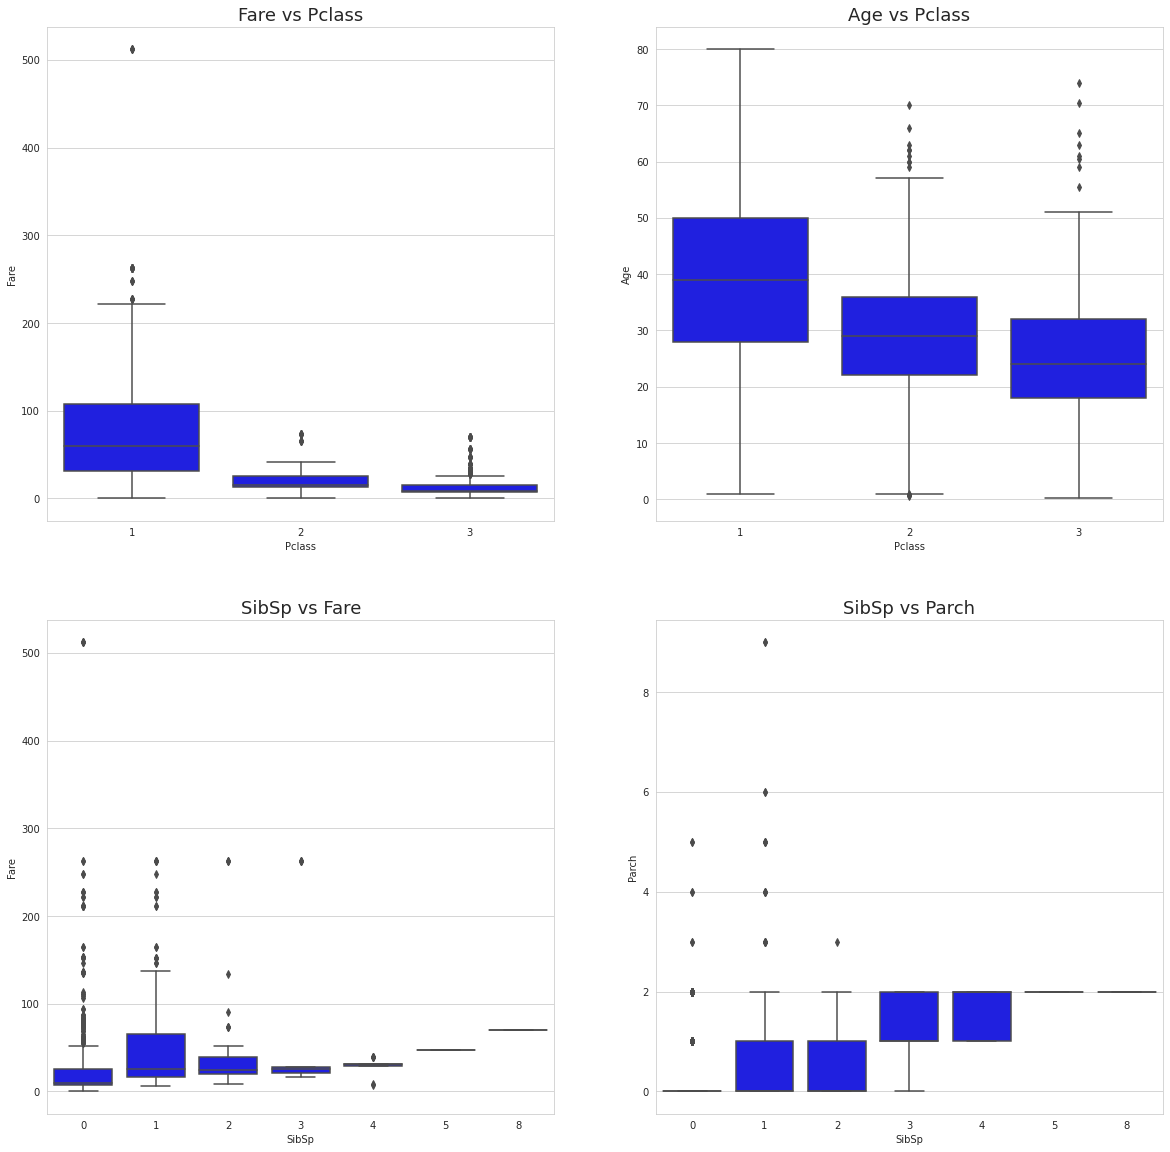

In [ ]:
f, ax = plt.subplots(nrows=2,ncols=2,figsize=(20,20))
sns.boxplot(x="Pclass",y="Fare",data=data,ax=ax[0,0],color='blue')
ax[0,0].set_title("Fare vs Pclass",fontsize=18)

sns.boxplot(x="Pclass",y="Age",data=data,ax=ax[0,1],color='blue')
ax[0,1].set_title("Age vs Pclass",fontsize=18)

sns.boxplot(x="SibSp",y="Fare",data=data,ax=ax[1,0],color='blue')
ax[1,0].set_title("SibSp vs Fare",fontsize=18)

sns.boxplot(x="SibSp",y="Parch",data=data,ax=ax[1,1],color='blue')
ax[1,1].set_title("SibSp vs Parch",fontsize=18)

# Data Cleaning 

In [ ]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## Replacing missing Age values

In [ ]:
mean_vals=data[["Sex","Pclass","Age"]].groupby(["Sex","Pclass"]).mean()

In [ ]:
mean_vals

Age
Sex    Pclass           
female 1       37.037594
       2       27.499223
       3       22.185329
male   1       41.029272
       2       30.815380
       3       25.962264

In [ ]:
mean_vals.iloc[0]["Age"]

37.037593984962406

In [ ]:
num=0
for sex in ['male','female']:
  for pclass in [1,2,3]:
    data.loc[(data["Age"].isnull())&(data["Sex"]==sex) & (data["Pclass"]==pclass),"Age" ]=mean_vals.iloc[num]["Age"]
    num+=1

In [ ]:
data["Age"].isnull().sum()

0

In [ ]:
data.iloc[31]

PassengerId                                                32
Survived                                                    1
Pclass                                                      1
Name           Spencer, Mrs. William Augustus (Marie Eugenie)
Sex                                                    female
Age                                                   41.0293
SibSp                                                       1
Parch                                                       0
Ticket                                               PC 17569
Fare                                                  146.521
Cabin                                                     B78
Embarked                                                    C
Name: 31, dtype: object

## Replacing missing Embarked values

In [ ]:
data[["Sex","Pclass","Embarked"]].groupby(["Sex","Pclass"]).agg(lambda x:x.value_counts().index[0])

Embarked
Sex    Pclass         
female 1             C
       2             S
       3             S
male   1             S
       2             S
       3             S

In [ ]:
data[data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


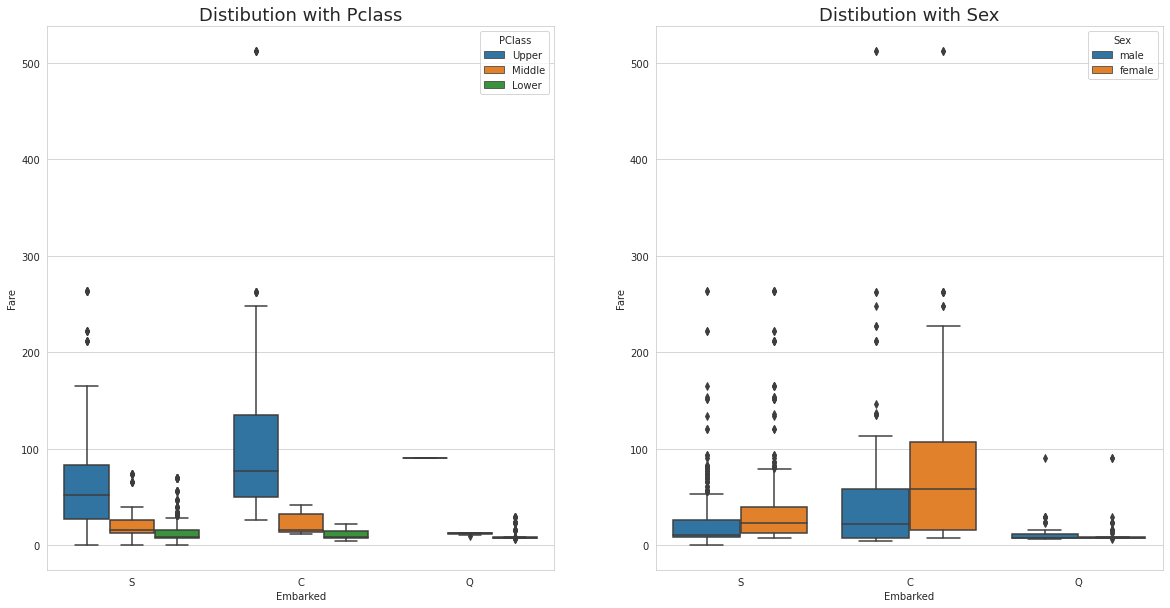

In [ ]:
fig,ax =plt.subplots(figsize=(20,10),ncols=2)
temp=sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=data,ax=ax[0])
sns.boxplot(x="Embarked", y="Fare", hue="Sex", data=data,ax=ax[1])
ax[0].set_title("Distibution with Pclass",fontsize=18)
ax[1].set_title("Distibution with Sex",fontsize=18)


leg_1 = temp.get_legend()
leg_1.set_title("PClass")
legs = leg_1.texts
legs[0].set_text('Upper')
legs[1].set_text('Middle')
legs[2].set_text('Lower')

In [ ]:
data["Embarked"].fillna("C", inplace=True)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.isnull().sum() ## As cabins have a low corr we can drop them later

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
dtype: int64

# Feature Engineering

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Making new feature family size

In [ ]:
data["fam_size"]=data["SibSp"]+data["Parch"]+1

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fam_size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


## Binarizng Sex

In [ ]:
from sklearn.preprocessing import LabelBinarizer
bin=LabelBinarizer()
data["Sex"]=bin.fit_transform(data["Sex"])

In [ ]:
data.head() # Male=1 and female =0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fam_size
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1


In [74]:
from sklearn.preprocessing import OneHotEncoder
bin1=OneHotEncoder()
feat1=pd.DataFrame(bin1.fit_transform(data["Pclass"].values.reshape(-1,1)).toarray())

In [75]:
for i in range(len(feat1.columns)):
  data["Pclass_"+str(i+1)]=feat1[i]

In [76]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fam_size,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0.0,0.0,1.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2,1.0,0.0,0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0.0,0.0,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2,1.0,0.0,0.0
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,0.0,0.0,1.0


## Dropping the data that is not needed

In [78]:
temp=data.copy()

In [79]:
temp.drop(["PassengerId","Cabin","SibSp","Parch"],axis=1,inplace=True)

In [80]:
temp.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,fam_size,Pclass_1,Pclass_2,Pclass_3
0,0.0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,S,2,0.0,0.0,1.0
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,C,2,1.0,0.0,0.0
2,1.0,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,S,1,0.0,0.0,1.0
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,S,2,1.0,0.0,0.0
4,0.0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,S,1,0.0,0.0,1.0
